# Анализ продаж консольных игр

## Описание проекта



Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.


## Просмотр данных 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats as st
from IPython.display import display
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
try:  # local import
    data = pd.read_csv('/Users/iyaneklyudova/Downloads/games.csv')
    
except:  # from Praktikum server
    data = pd.read_csv('/datasets/games.csv')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть пропуски. В колонках **Name, Genre** и **Year_of_Release** их мало (меньше 5%), а в колонках с данными о рейтингах  **Critic_Score, User_Score** и **Rating** пропусков довольно много (около 50%) 

In [3]:
display(data.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Названия колонок содержат строчные и заглавные буквы. Нужно привести к единому типу. Колонка с годом **Year_of_Release** в формате дробных чисел. Необходимо привести к целым числам. И колонка с рейтингом **User_Score** имеет тим object, а должно быть числом.

In [4]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


Дубликатов нет

**Вывод.** Необходима предварительная обработка данных

## Предобработка данных

Приведем названия колонок к строчным буквам.

In [5]:
data.columns = data.columns.str.lower()
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Поменяем тип данных у колонок **year_of_release** (на целые числа) и **user_score** (на дробные числа)

In [6]:
data['year_of_release'] = data['year_of_release'].astype('Int64', errors= 'ignore')
data['user_score'] = data['user_score'].astype('Float64', errors= 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


Посмотрим на содержание колонок

Проверим есть ли в колонке **platform** названия на разных языках

In [7]:
print(data['platform'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Все названия на латинице. Ничего менять не надо.

Проверим колонку **genre**

In [8]:
print(data['genre'].unique())

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]


Названия выглядят нормально, но есть пропуски - nan. Посмотрим что это за строки с пропусками

In [9]:
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Ни названия, ни жанра, ни одного рейтинга. Никаких признаков, по которым можно заполнить пропуски. Это мог быть сбой в выгрузке данных. Но это всего 2 строки. Удалим, тк они содержат минимум информации

In [10]:
data= data.drop([659, 14244])
display(data[data['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Проверим колонки с рейтингами **rating, critic_score** и **user_score**, где были самые большие пропуски

In [11]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [12]:
print(data['critic_score'].unique())

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]


In [13]:
print(data['user_score'].unique())

['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']


Все выглядит нормально, кроме пропусков **nan** и статуса **tbd** в колонке **user_score** . Колонка **rating** показывает рейтинг ESRB- Entratainment Software Rating Board. Эта организация была основана только в 1994 году. А игры существовали задолго до этого. Посмотрим какой самый ранний год выпуска игр

In [14]:
data['year_of_release'].min()

1980

C 1980 года многие игры к 1994 уже перестали продаваться и не оценивались этой организацией. В колонках **critic_score** и **user_score** пропуски  могут быть связаны с тем, что оценок еще не было, тк это новая игра, например, или оценок было так мало, что это не позволяет вычислить средний рейтинг. Либо это также очень давние игры и тогда было не принято выставлять рейтинги и оценки играм. Также возможно была и ошибка при выгрузке данных. 

Заполнять пропуски средними значениями в зависимости от жанра или платформы было бы неправильно, тк рейтинг это  очень субъективная оценка людей, которая зависит от многих факторов. Оставим пропуски как есть, тк удаление их приведет к потере больших данных по продажам по различным платформам.

Статус **tbd** означает to de determined, т.е. рейтинг подлежит определению. Это значит оценок еще нет либо их настолько мало, что определить рейтинг пока невозможно. Т.е. tbd то же самое что и пропуск. Заменим на nan , тк нам нужны числовые значения в колонке.

In [15]:
data['user_score']= data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('Float64', errors= 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Посмотрим какую долю составляют пропуски в колонке **year_of_release**

In [16]:
print(data.isna().sum()/len(data)*100)

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         54.586250
rating             40.471489
dtype: float64


Пропусков меньше 2%. Заполнить их нечем, тк привязки к другим данным в таблице нет. Поэтому удалим строки с пропусками

In [17]:
data.dropna(subset = ['year_of_release'], inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null Int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Посчитаем общую сумму продаж.

In [18]:
data['total_sales'] = data['na_sales']+ data['eu_sales']+ data['jp_sales']+ data['other_sales']
display(data.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


**Вывод.** В файле изменен тип данных, пропуски, составляющие меньше 5% данных, удалены, а остальные оставлены без изменений, добавлена колонка с общей суммой продаж.

## Исследовательский анализ данных

### Общий анализ продаж 

 Посмотрим сколько игр выпускалось в разные годы

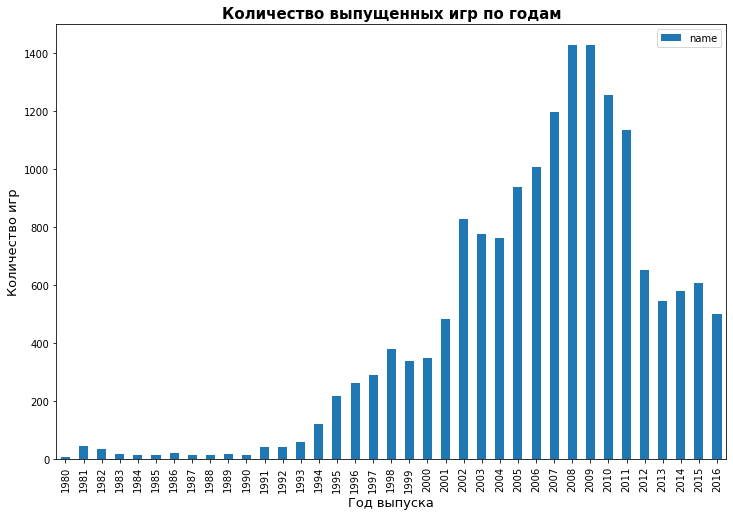

In [19]:
data.pivot_table(index= 'year_of_release', values='name', aggfunc = 'count').plot(y='name', kind='bar', figsize=(12,8))
plt.xlabel('Год выпуска', fontsize=13)
plt.ylabel('Количество игр', fontsize=13)
plt.title('Количество выпущенных игр по годам', fontsize=15, fontweight='bold')
plt.show()

С 1994 года начинается активный рост. В декабре 1994 года Sony начала выпуск популярной платформы PlyStation. В 2002 году происходит резкий скачок и пик был в 2008 - 2009 годах. Затем начинается спад и в 2016 году кол-во выпускаемых игр вернулось к уровню 2001 года. В 2010-х годах начинают активно выпускаться игры для смартфонов и игры на платформах теряют популярность. Широко известная игра Angry Birds для смартфонов была выпущена в конце 2009 года 

Посмотрим на продажи по платформам

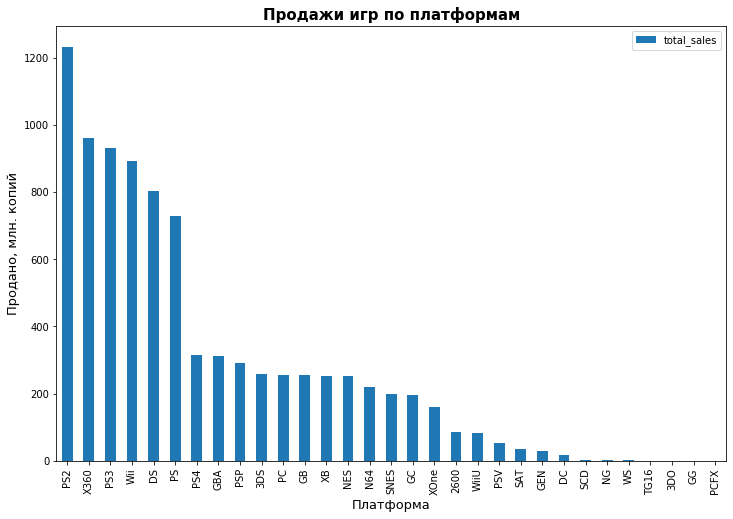

In [20]:
data.pivot_table(index= 'platform', values='total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(12,8))
plt.xlabel('Платформа', fontsize=13)
plt.ylabel('Продано, млн. копий', fontsize=13)
plt.title('Продажи игр по платформам', fontsize=15, fontweight='bold')
plt.show()

Самой попуярной платформой оказалась PS2. Также достаточно популярны X360, PS3, Wii, DS и PS. У остальных платформ продажи в 2 и более раз меньше. 

###  Продажи по наиболее популярным платформам 

Посмотрим распределение продаж по годам для наиболее популярных платформ. Сначала сделаем выборку по платформам и сгруппируем данные по году выпуска игр и по платформам

In [21]:
data_top_platform = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS" )').groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
display(data_top_platform.head())

,year_of_release,platform,total_sales
0,1985,DS,0.02
1,1994,PS,6.03
2,1995,PS,35.96
3,1996,PS,94.70
4,1997,PS,136.17


Построим график распределения продаж

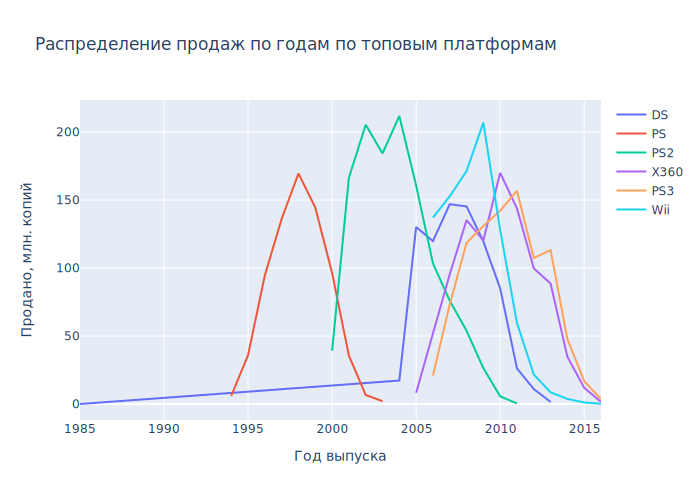

In [22]:
fig = px.line(data_top_platform, y = 'total_sales', x = 'year_of_release', color ='platform', 
              labels=dict(year_of_release="Год выпуска",total_sales= "Продано, млн. копий", platform =""),title="Распределение продаж по годам по топовым платформам")
fig.show("svg")

 Посмотрим на продолжительность жизни платформ

- PS: с 1994 по 2003 - 10 лет
- PS2: c 2000 по 2011 - 11 лет
- PS3: c 2006  по 2016 (на 2016 еще немного жива) - 10 лет
- X360: c 2005 по 2016 (на 2016 еще немного жива) - 11 лет
- Wii: с 2006 по 2016 (на 2016 еще немного жива) - 10 лет
- DS: есть данные о выпуске в 1985  году, а затем с 2004 по 2013 год. DS выпускает Nintendo и официально эту платформу они выпустили в 2004. Возможно до этого были какие то прототипы, продажи по которым не фиксировали. Будем считать что платформа прожила 9 лет с момента официального релиза.

То есть продолжительность жизни консоли в среднем 10 лет.


6 поколение консолей было запущено в 2005 году и к 2017 году уже умирает. 7 поколение консолей начали выпускать в 2012 году. И в 2012 году же произошел резкий спад продаж и затем падение становится не таким резким. Поэтому для анализа актуального периода возьмем данные с 2012 по 2016 год.

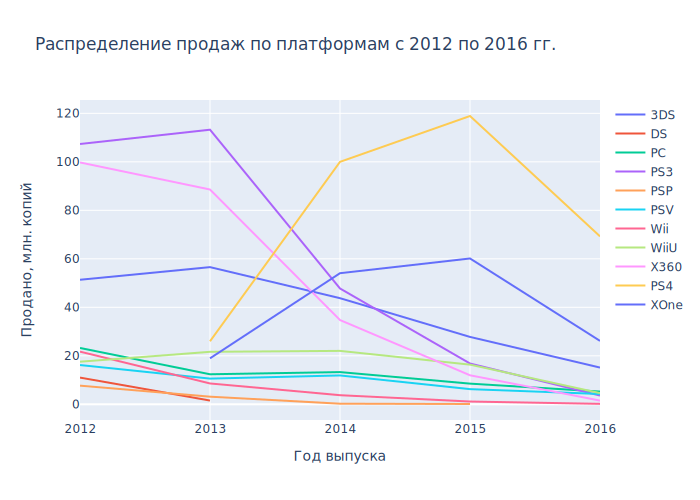

In [23]:
data_actual_time = data[data['year_of_release'] >= 2012].groupby(['year_of_release','platform'])['total_sales'].sum().reset_index()
fig = px.line(data_actual_time, y = 'total_sales', x = 'year_of_release', color ='platform', 
              labels=dict(year_of_release="Год выпуска", total_sales= "Продано, млн. копий", platform =""), title="Распределение продаж по платформам с 2012 по 2016 гг." )
fig.show("svg")

До 2015 года происходят колебания в продажах. Лишь у 2-х новых платформ PS4 и XOne наблюдется рост. Но к концу 2016 году наблюдается падение продаж уже у всех платформ. В топе продаж на 2016 год игры для платформ PS4, XOne  и 3DS. Учитывая и общую тенденцию к снижению продаж, начиная с 2010 года (выше был график "Количество выпущенных игр по годам"), и усиливающуюся конкуренцию со стороны игр для смартфонов, можно предположить, что в 2017 году продажи будут продолжать падать. Потенциальную прибыль в 2017 году еще могут принести игры, выпускаемые для PS4, XOne  и 3DS, а также шанс есть у WiiU и PSV, тк их жизненный цикл еще меньше 10 лет


Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Возьмем топ 6 по продажам в целом и добавим 3 платформы в топе продаж на 2016 год

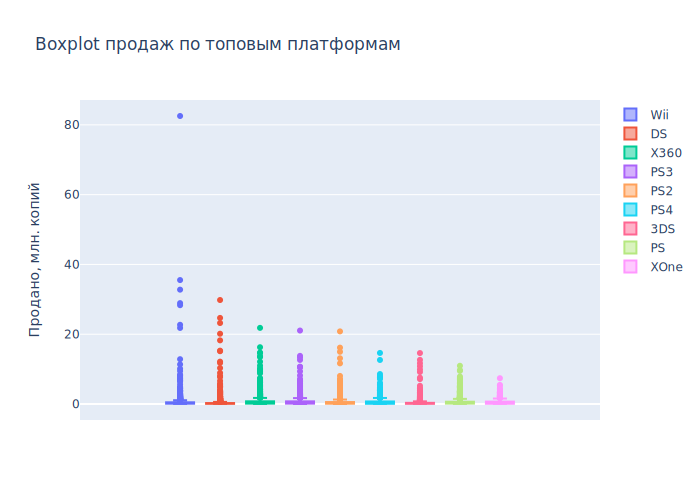

In [24]:
data_platform_selected = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS" , "PS4", "XOne", "3DS")')
fig=px.box(data_platform_selected, y = "total_sales" ,color ='platform',
                          labels=dict( total_sales= "Продано, млн. копий", platform =""), 
           title = "Boxplot продаж по топовым платформам")

fig.show("svg")

Очень много выбросов. Посмотрим крупнее

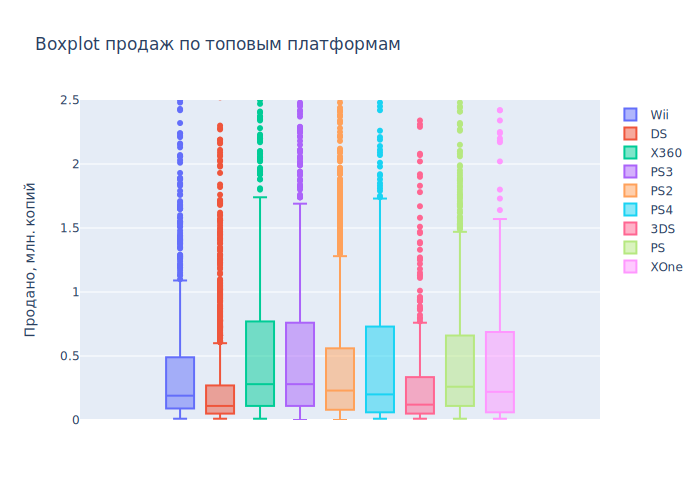

In [25]:
data_platform_selected = data.query('platform in ("PS2", "X360", "PS3", "Wii", "DS", "PS" , "PS4", "XOne", "3DS")')
fig=px.box(data_platform_selected, y = "total_sales" ,color ='platform', range_y = [0,2.5],
                          labels=dict( total_sales= "Продано, млн. копий", platform =""), 
           title = "Boxplot продаж по топовым платформам")

fig.show("svg")

Медиана продаж колеблется от 0.11 до 0.28М проданных копий. Верхняя граница, за которыми начинаются выбросы у большинства платформ 1-1,5М. Только у DS и 3DS эта граница ниже 1М ( у этих же платформ и самые низкие медианы). Недавно вышедшая PS4 по медиане продаж уже почти догнала своего самого популярного предшественника PS2. В целом, у всех версий платформы PlayStation выская медиана и границы квантилей и выбросов. Так же и у X360 и XOne. 

###  Продажи в разрезе одной из популярных платформ 

Посмотрим как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем X360. У этой платформы 2 место по продажам и она еще существует на 2016 год

In [26]:
x360=data[(data['platform']=='X360')&(data['critic_score']!="nan")]

Построим диаграмму рассеяния зависимости продаж от оценки критиков

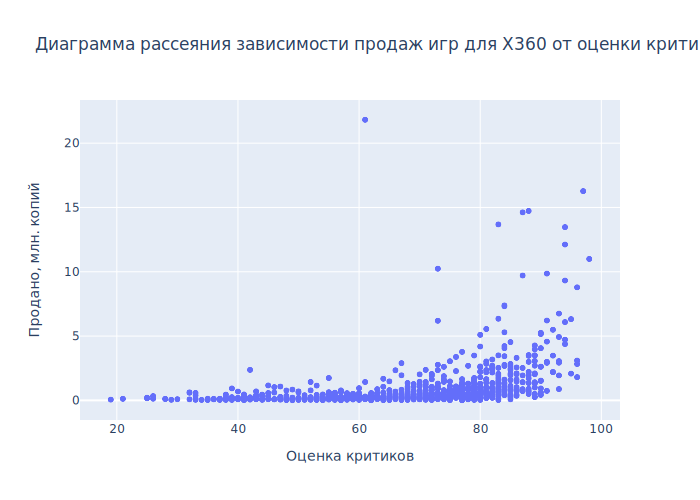

In [27]:
fig = px.scatter(x360, x= "critic_score", y = 'total_sales',labels=dict( critic_score = "Оценка критиков",
                total_sales= "Продано, млн. копий" ), title = "Диаграмма рассеяния зависимости продаж игр для X360 от оценки критиков")
fig.show("svg")

Из диаграммы рассеяния можно заметить, что есть определенная тенденция к росту продаж при увеличении оценки критиков.

Построим диаграмму рассеяния зависимости продаж от оценки пользователей

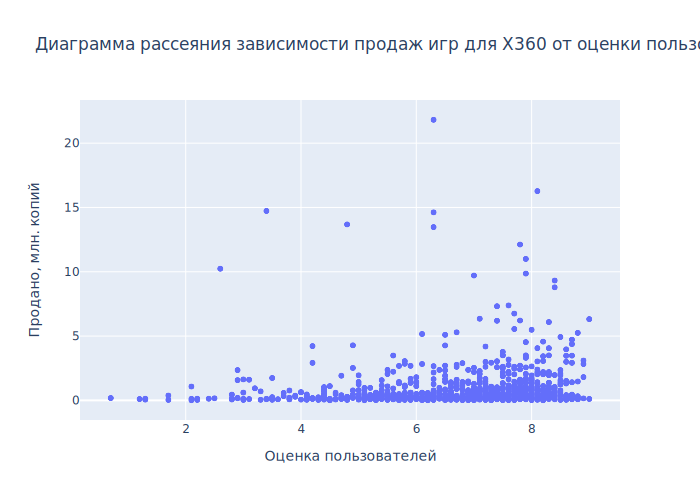

In [28]:
x360_user=data[(data['platform']=='X360')&(data['user_score']!="nan")]
fig = px.scatter(x360_user, x= "user_score", y = 'total_sales', labels=dict( user_score = "Оценка пользователей",
                total_sales= "Продано, млн. копий"), title = "Диаграмма рассеяния зависимости продаж игр для X360 от оценки пользователей")
fig.show("svg")

Из диаграммы рассеяния видно, что есть некоторая тенденция к росту продаж при увеличении оценки пользователей, но она не такая явная как при оценке критиков. Можно заметить колебания в продажах. Вероятно, покупатели при покупке принимают во внимание и другие факторы. 

Посмотрим на корреляцию. 

In [29]:
x360_filtered = x360[['total_sales', 'critic_score','user_score']]
plt.figure(figsize=(1,3))
sns.heatmap(x360_filtered.corr()[['total_sales']].sort_values(by = 'total_sales', ascending=False),cmap = "Blues", annot= True, annot_kws={'size':13} )
plt.show()


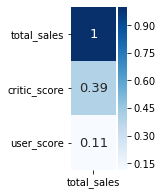

Оценка критиков в значительно большей степени влияет на продажи, чем оценка пользователей. Критикам доверяют больше чем обычным пользователям. Многие склонны считать, что за обычными пользователями скрываются боты, которые накручивают положительные отзывы. 

Посмотрим на корреляцию по другим популярным платформам

In [30]:
platform_list= ["PS2", "PS3", "Wii", "DS", "PS" , "PS4", "XOne", "3DS"]
rows = 4
cols = 2
fig, axes = plt.subplots(rows, cols, figsize = (12,8))
count= 0
for i in range(rows):
    for c in range(cols):
        platform_name= platform_list[count]
        data_sample = data[(data['platform']== platform_name)]
        data_for_map = data_sample[['total_sales', 'critic_score','user_score']]
        sns.set(font_scale=1.2)
        ax=sns.heatmap(data_for_map.corr()[['total_sales']].sort_values(by = 'total_sales', ascending=False),
                        cmap = "Blues", annot= True, annot_kws={'size':13}, ax=axes[i,c])
        ax.set_title(platform_name, fontsize= 18)
        ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
        plt.tight_layout(pad=2)
        count+=1

   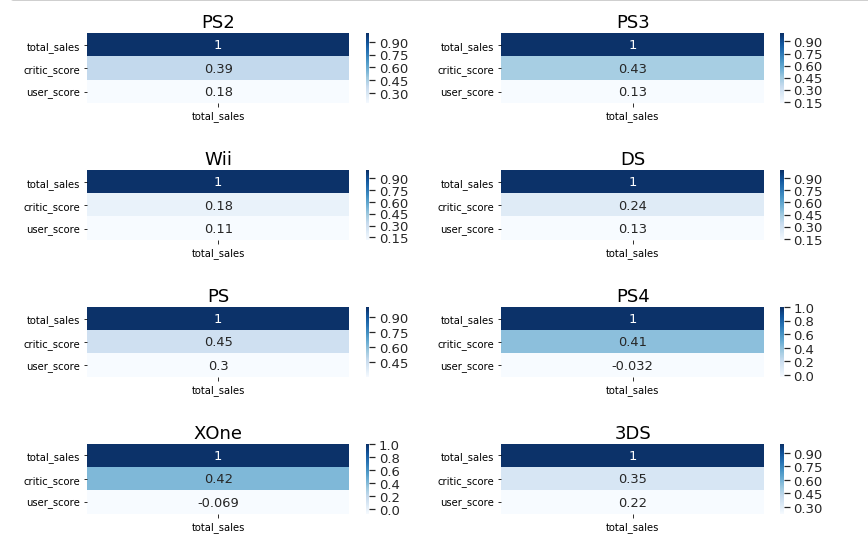

У большинства платформ такая же тенденция. Продажи игр больше зависят от оценки критиков, чем от оценки пользователей. Только у Wii и DS зависимость от оценки критиков меньше, чем у других платформ. Самая большая зависимость от оценки пользователей у 3DS. У игр для платформ XOne и PS4 зависимость от оценок пользователей отсутствует. 

### Продажи игр по жанрам 

Общее распределение продаж игр по жанрам

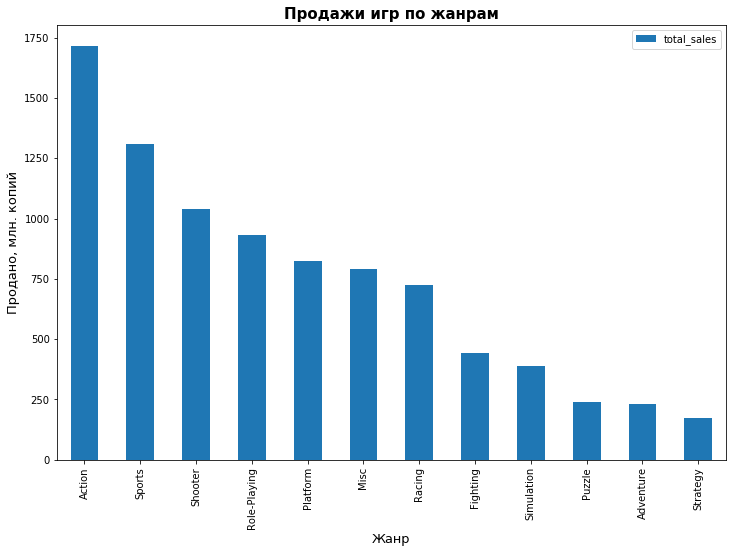

In [31]:
data.pivot_table(index= 'genre', values='total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending=False).plot(y='total_sales', kind='bar', figsize=(12,8))
plt.xlabel('Жанр', fontsize=13)
plt.ylabel('Продано, млн. копий', fontsize=13)
plt.title('Продажи игр по жанрам', fontsize=15, fontweight='bold')
plt.show()

По продажам лидирует жанр Action. На 2 месте - Sports, на 3 месте - Shooter. На последнем месте -  Strategy. 

Посмотрим так же кол-во выпускаемых игр по жанрам

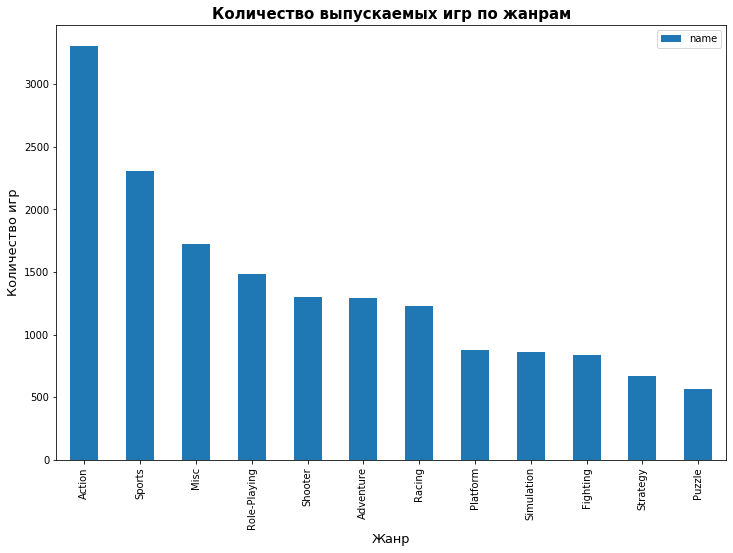

In [32]:
data.pivot_table(index= 'genre', values='name', aggfunc = 'count').sort_values(by='name', ascending=False).plot(y='name', kind='bar', figsize=(12,8))
plt.xlabel('Жанр', fontsize=13)
plt.ylabel('Количество игр', fontsize=13)
plt.title('Количество выпускаемых игр по жанрам', fontsize=15, fontweight='bold')
plt.show()

На 1 и 2 месте также игры в жанрах Action и Sports. А вот жанр Shooter оказался на 5 месте. На 3 месте - Misc. Это значит игр в жанре Shooter выпускается меньше чем в жанре Misc, но продаются они активнее чем Misc. Медиана продаж у Shooter 0,24, а у Misc  - 0,16.
Так же из таблицы ниже видно, что в жанре  Adventure  выпускается столько же игр, как и в жанре  Shooter, но по продажам они занимают предпоследнее место. 

In [33]:
data_stat= data.groupby('genre').agg({'total_sales': 'sum', 'name':'count'}).sort_values(by='name', ascending = False)
data_stat2= data.groupby('genre').agg({'total_sales':'median'})
data2 = pd.concat([data_stat,data_stat2], axis=1)
data2=data2.reset_index()
data2.columns=['Жанр','Проданных копий, млн.', 'Кол-во игр, шт','Медиана продаж']

print(data2.sort_values(by='Проданных копий, млн.', ascending = False))


            Жанр  Проданных копий, млн.  Кол-во игр, шт  Медиана продаж
0         Action                1716.52            3307            0.19
10        Sports                1309.67            2306            0.22
8        Shooter                1041.36            1296            0.24
7   Role-Playing                 931.08            1481            0.18
4       Platform                 825.55             878            0.27
3           Misc                 790.29            1721            0.16
6         Racing                 723.49            1226            0.19
2       Fighting                 442.66             837            0.21
9     Simulation                 387.96             857            0.15
5         Puzzle                 239.89             569            0.10
1      Adventure                 233.33            1293            0.05
11      Strategy                 172.57             673            0.10


**Вывод.** С 1994 до 2009 года рынок консольных игр находился на подъеме, а затем, с развитием игр для смартфонов, начал падать и к 2016 году упал более чем в 2 раза от пика в 2009 году. Рынок вероятно будет падать и в 2017 году, тк конкуренция мобильных игр растет. Средняя продолжительность жизни консоли 10 лет. Самой популярной платформой была PS2 от компании Sony. Ее новая версия PS4 существует на рынке совсем недавно, но при этом в 2016 году лидирует по продаже игр и еще имеет потенциал приносить прибыль в 2017 году. Лучше всего продаются игры в жанре Action, а наибольшее влияние на продажи оказывает оценка критиков

##  Портрет пользователя каждого региона 

### Самые популярные платформы (топ-5)

Сделаем сводную таблицу по платформам и суммам продаж по регионам

In [34]:
data_regions= data.pivot_table(index='platform', values=('na_sales', 'eu_sales','jp_sales'), aggfunc='sum')
display(data_regions.head())

,eu_sales,jp_sales,na_sales
platform,,,
2600,4.86,0.00,80.78
3DO,0.00,0.10,0.00
3DS,61.27,100.62,82.65
DC,1.69,8.56,5.43
DS,188.41,175.02,380.31


Посмотрим самые популярные платформы по регионам.

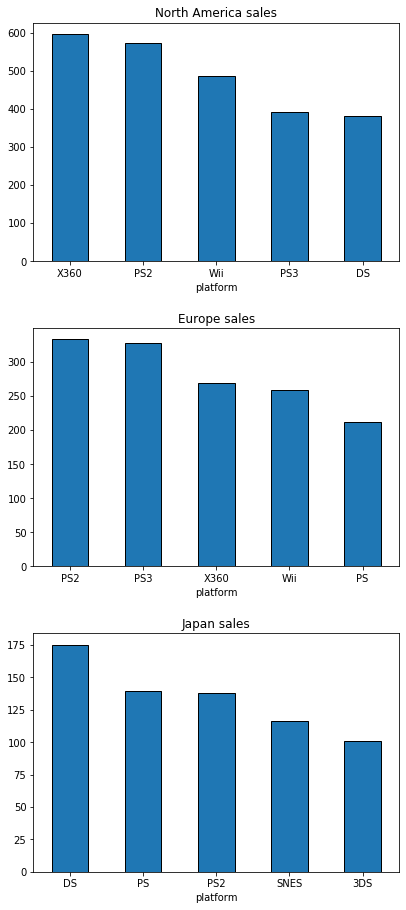

In [35]:
rows=3
fig,axes = plt.subplots(rows, figsize=(6,13))
columns_list= ['na_sales', 'eu_sales','jp_sales']
title_dic = {'na_sales': 'North America sales', 'eu_sales':'Europe sales','jp_sales':'Japan sales'}
count=0
for i  in range(rows):
    data_regions[columns_list[count]].sort_values( ascending=False)[:5].plot(kind='bar', ec='black', ax = axes[i],
                                                            rot=0, title =title_dic [columns_list[count]])
    count+=1
plt.tight_layout(pad=2)
plt.show()

В Северной Америке на 1 месте X360 от американской компании Microsoft, тогда как в Европе она на 3 месте, а в Японии вообще в топ5 не входит. В Японии предпочитают японские платформы: в топе платформы от Sony и Nintendo, а самая популярная - DS. В Европе PS2 и PS3 примерно одинаково популярны- на 1 и 2 месте соответственно.

### Самые популярные жанры (топ-5)

Посмотрим самые популярные жанры по регионам.

In [36]:
data_genre_regions= data.pivot_table(index='genre', values=('na_sales', 'eu_sales','jp_sales'), aggfunc='sum')
display(data_genre_regions.head())

,eu_sales,jp_sales,na_sales
genre,,,
Action,510.99,160.14,863.17
Adventure,63.20,52.24,101.52
Fighting,99.00,87.28,220.51
Misc,210.60,107.02,399.57
Platform,199.39,130.71,444.44


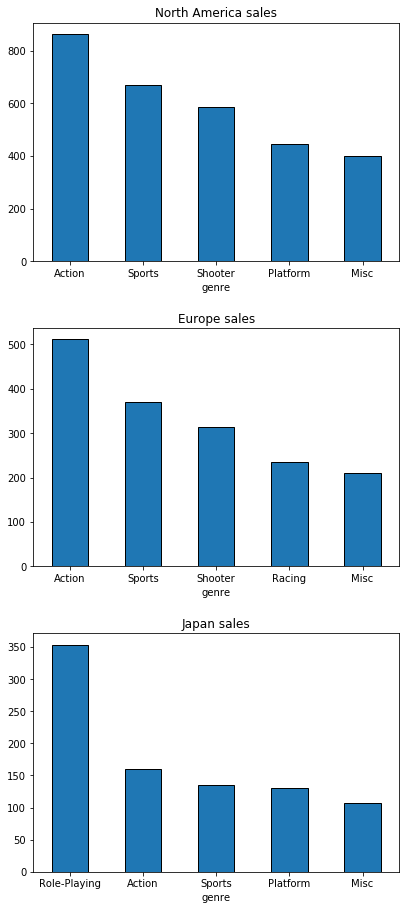

In [37]:
rows=3
fig,axes = plt.subplots(rows, figsize=(6,13))
columns_list= ['na_sales', 'eu_sales','jp_sales']
title_dic = {'na_sales': 'North America sales', 'eu_sales':'Europe sales','jp_sales':'Japan sales'}
count=0
for i  in range(rows):
    data_genre_regions[columns_list[count]].sort_values( ascending=False)[:5].plot(kind='bar', ec='black', ax = axes[i], 
                                                                    rot=0, title =title_dic [columns_list[count]])
    count+=1
plt.tight_layout(pad=2)
plt.show()

В Северной Америке и Европе топ 3 популярных жанров одинаковый: Action, Sports и Shooter, а в Японии на первом месте Role-Playing (которого нет в топе Северной Америки и Европы), Action и Sports - на 2 и 3 месте соответсвенно. В Европе в топ5 входит также жанр Racing, тогда как в Японии и Северной Америке этого жанра в топе нет

### Влияние рейтинга ESRB на продажи в отдельном регионе 

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе

Сначала приведем рейтинг в понятный вид. Рейтинг 'K-A' -  устаревший рейтинг Kids to Adults, сейчас это рейтинг 'E' - Everyone. Поэтому объединим их в один рейтинг "Для всех"

In [38]:
print(data['rating'].unique())

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [39]:
data['rating']= data['rating'].replace('E', 'Для всех')
data['rating']= data['rating'].replace('K-A', 'Для всех')
data['rating']= data['rating'].replace('M', 'Для взрослых')
data['rating']= data['rating'].replace('T', 'Подросткам')
data['rating']= data['rating'].replace('E10+', 'Для всех старше 10 лет')
data['rating']= data['rating'].replace('RP', 'Ожидает рейтинга')
data['rating']= data['rating'].replace('AO', 'Только для взрослых')
data['rating']= data['rating'].replace('EC', 'Для детей младшего возраста')
data['rating']= data['rating'].fillna('Нет рейтинга')
display(data.head())


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,Для всех,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,Для всех,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,Для всех,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга,31.38


Посмотрим на графике продажи по рейтингу

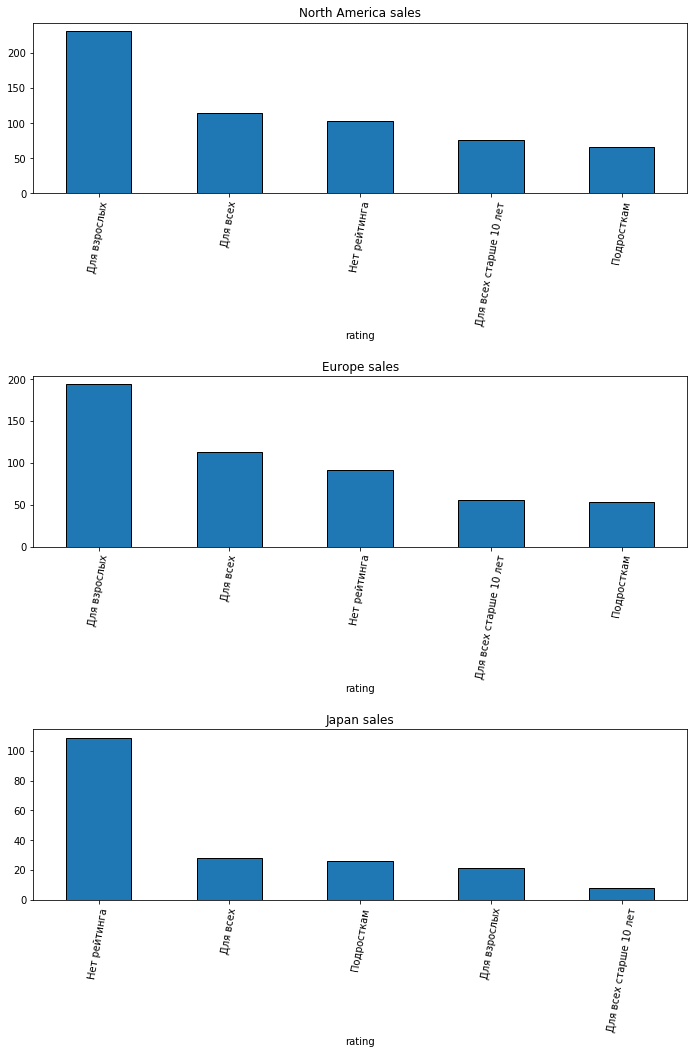

In [40]:
data_rating_regions= data[data['year_of_release'] >= 2012].pivot_table(index='rating', values=('na_sales', 'eu_sales','jp_sales'), aggfunc='sum')
cols=3
fig,axes = plt.subplots(cols, figsize=(10,15))
columns_list= ['na_sales', 'eu_sales','jp_sales']
title_dic = {'na_sales': 'North America sales', 'eu_sales':'Europe sales','jp_sales':'Japan sales'}
count=0
for i  in range(cols):
    data_rating_regions[columns_list[count]].sort_values( ascending=False)[:5].plot(kind='bar', ec='black', 
                                            ax = axes[i], rot=80, title =title_dic [columns_list[count]])
    count+=1
plt.tight_layout(pad=2)
plt.show()

В Сев. Америке и Европе больше всего продаж у игр с рейтингом "Для взрослых". На втором месте игры с рейтингом "Для всех". В Японии много продавалось игр, у которых нет рейтинга. Это могли быть либо новые игры, на которые еще не выставили рейтинги, либо игры, которые не отправлялись на оценку в ESRB. В Японии существует своя система рейтингов CERO. То есть это могли быть игры, выпускаемые только для японского рынка и оценка в ESRB для них не проводилась. На втором месте в Японии игры с рейтингом "Для всех"



**Вывод**. Предпочтения по платформам в регионах отличаются. В Сев. Америке более популярна платформа X360, в Японии DS, а в Европе PS2. В Сев. Америке и Европе популярные жанры совпадают, там лучше продаются игры в стиле Action. А в Японии лидирует жанр Role-Playing. Из игр, которые, оценивались в ESRB, в Сев. Америке и Европе лучше продаются если у них стоит рейтинг "Для взрослых"", в Японии - "Для всех". При этом в Японии продается много игр без рейтинга ESRB

## Проверка гипотез

### Гипотеза№1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза(Н0). Между данными нет связи. Предположим что средние пользовательские рейтинги платформ Xbox One и PC не различаются

Альтернативная гипотеза (Н1). Средние пользовательские рейтинги платформ Xbox One и PC различаются между собой

Сделам выборку и сравним дисперсии рейтингов

In [41]:
data_xone = data[(data['platform'] == 'XOne')&(data['user_score']!="nan")]['user_score']
data_pc = data[(data['platform'] == 'PC')&(data['user_score']!="nan")]['user_score']
variance_data_xone = np.var(data_xone, ddof=1)
variance_data_pc = np.var(data_pc, ddof=1)
print('Дисперсия пользовательского рейтинга Xbox One', variance_data_xone)
print('Дисперсия пользовательского рейтинга PC', variance_data_pc)

Дисперсия пользовательского рейтинга Xbox One 1.9069968429360702
Дисперсия пользовательского рейтинга PC 2.3492243750768553


Дисперсии отличаются более чем на 5%, значит они разные и параметр equal_var считаем Flase

Проверим гипотезу о равенстве средних

In [42]:
alpha = 0.05 
results = st.ttest_ind(
    data_xone, 
    data_pc, equal_var= False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


p-значение оказалось очень маленьким и получить различия случайно маловероятно. На этом основании отвергаем нулевую гипотезу H0. В среднем по рейтингам пользователей у платформ Xbox One и PC имеются статистически значимые различия

### Гипотеза№2. Средние пользовательские рейтинги жанров Action и Sports разные.

Нулевая гипотеза(Н0). Между данными нет связи. Предположим что средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза (Н1). Средние пользовательские рейтинги жанров Action и Sports различаются между собой

Сделам выборку и сравним дисперсии рейтингов

In [43]:
data_action = data[(data['genre'] == 'Action')&(data['user_score']!="nan")]['user_score']
data_sports = data[(data['genre'] == 'Sports')&(data['user_score']!="nan")]['user_score']
variance_data_action = np.var(data_action, ddof=1)
variance_data_sports = np.var(data_sports, ddof=1)
print('Дисперсия рейтинга жанра Action', variance_data_action)
print('Дисперсия рейтинга жанра Sports', variance_data_sports)

Дисперсия рейтинга жанра Action 2.027493768262491
Дисперсия рейтинга жанра Sports 2.6230558125192656


Дисперсии отличаются более чем на 5%, значит они разные и параметр equal_var считаем Flase

Проверим гипотезу о равенстве средних

In [44]:
alpha = 0.05 
results = st.ttest_ind(
    data_action, 
    data_sports, equal_var= False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: nan
Не получилось отвергнуть нулевую гипотезу


Средние пользовательские рейтинги жанров Action и Sports имеют определенные различия и с вероятностью 10% получить их можно случайно. Это слишком высокая вероятность случайности, которая выше порога 5%. Поэтому у нас нет достаточных оснований полагать, что различия статистически значимы. Значит нулевую теорию (Н0) о том, что рейтинги не отличаются не отвергаем.

**Вывод**. Исходя из двустронних гипотез и результатов статистического теста можно сказать, что средние пользовательские рейтинги платформ Xbox One и PC различаются между собой, а рейтинги жанров Action и Sports  схожи.

## Общие выводы

В 1994 году с выпуском популярной платформы PlyStation начинается рост всего рынка консольных игр, пик которого приходится на 2008-2009 года. Затем происходит спад и в 2016 году продажи падают до уровня 2001 года, что более чем в 2 раза ниже пиковых значений 2008-2009 гг. С 2010 года усиливается конкуренция со стороны игр для мобильных устройств (смартфоны, планшеты). И в 2017 года рынок скорее всего продолжит падать. 

В 2016 году по продажам лидируют игры, выпускаемые для PS4, XOne и 3DS. Жизненный цикл платформы составляет в среднем 10 лет. У платформ PS4, XOne и 3DS он не закончился и потенциально они еще могут принести прибыль в 2017 году.

В целом по продаже  игр лидирует платформа PS2,  на 2 и 3  месте X360 и PS3 соответственно. Но по регионам предпочтения у пользователей различаются. В Сев. Америке отдают предпочтение американской платформе X360, в Японии  - DS от Nintendo, а в Европе японские PS2 и PS3 примерно одинаково популярны.

Больше всего игр в целом по рынку выпускается и продается в жанре Action. На 2 и 3 месте по продажам лидируют Sports и  Shooter соответственно. В Сев. Америке и Европе картина такая же, а вот в Японии на первом месте жанр Role-Playing (Action только на 2 месте)

По рейтингу ESRB больше всего игр в целом и по разным регионам продается в категории "Для взрослых", а в Японии продается много игр без рейтинга ESRB.

На продажи игр в большей степени влияют оценки критиков, чем оценки пользователей. Самая большая зависимость от оценки пользователей у платформы 3DS, но и у этой платформы критикам доверяют больше. 

Пр результатам статистического теста можно сказать, что средние пользовательские рейтинги платформ Xbox One и PC различаются между собой, а рейтинги жанров Action и Sports схожи.